In [32]:
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as AUC
from sklearn import cross_validation
import sklearn.metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

import urllib
from math import sqrt
from sklearn import tree
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import StringIO
#from pydot import graph_from_dot_data as gdot
from sklearn.externals.six import StringIO

In [5]:
#Simply replace the directory name where your data are stored
#Directory = r'/media/galeazzi/BIGFORK/KaggleData/FraudDataSet/'
Directory = r'E:\\Projects\\ML_Sandbox\\Fraud-Detection\\'
rawData  = pd.read_csv(Directory+'DataSet.csv',sep=';')

In [6]:
#Quick look at the dataset
rawData.describe()

,IsFraud,UserId,Age,RegWeekDay,RegHour,MobileFlag,TVFlag,RegistrationId,FamilyStatusId,SexualityId,TrackingcodeFlag,ResidenceCountryId,RegCountryEqualsIpCountryFlag
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.505300,57591.673500,35.075700,3.040000,12.715900,0.052400,0.031000,997.750100,1.366200,1.056800,0.446500,22.214000,0.584600
std,0.499997,33312.311649,10.094046,2.030865,6.939467,0.222843,0.173326,1103.965371,0.716344,0.299304,0.497154,17.734234,0.492816
min,0.000000,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,28760.500000,28.000000,1.000000,7.000000,0.000000,0.000000,246.000000,1.000000,1.000000,0.000000,8.000000,0.000000
50%,1.000000,57478.500000,32.000000,3.000000,14.000000,0.000000,0.000000,801.000000,1.000000,1.000000,0.000000,15.000000,1.000000
75%,1.000000,86268.750000,42.000000,5.000000,19.000000,0.000000,0.000000,827.000000,1.000000,1.000000,1.000000,43.000000,1.000000
max,1.000000,115657.000000,91.000000,6.000000,23.000000,1.000000,1.000000,4596.000000,3.000000,3.000000,1.000000,53.000000,1.000000


In [7]:
rawData.dtypes

IsFraud                           int64
UserId                            int64
Age                               int64
RegWeekDay                        int64
RegHour                           int64
BranchId                         object
MobileFlag                        int64
TVFlag                            int64
RegistrationId                    int64
FamilyStatusId                    int64
SexualityId                       int64
TrackingcodeFlag                  int64
ResidenceCountryId                int64
EmailHostID                      object
IpCountryId                      object
RegCountryEqualsIpCountryFlag     int64
dtype: object

In [8]:
from copy import deepcopy
freudDs = deepcopy(rawData)

In [9]:
freudDs.EmailHostID = rawData.EmailHostID.astype('category')
freudDs.BranchId = rawData.BranchId.astype('category')
freudDs.IpCountryId = rawData.IpCountryId.astype('category')

In [10]:
#As recommended in the description of the exercise I split the dataset in a training set randomly sampled
#and the remaining 30% will be used to test my prediction model.
y = freudDs.pop('IsFraud')
X = freudDs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
allNcVars = list(freudDs.dtypes[X_train.dtypes == 'int64'].index)

In [12]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [13]:
#Scaling the features
for l in allNcVars:
    X_train[l]=preprocessing.scale(X_train[l].astype('float64'))
    X_test[l]=preprocessing.scale(X_test[l].astype('float64'))

In [267]:
#pd.scatter_matrix(train, alpha=0.2, figsize=(25, 25), diagonal='hist');

In [14]:
labels = X_train.columns
X_train.dtypes

UserId                           float64
Age                              float64
RegWeekDay                       float64
RegHour                          float64
MobileFlag                       float64
TVFlag                           float64
RegistrationId                   float64
FamilyStatusId                   float64
SexualityId                      float64
TrackingcodeFlag                 float64
ResidenceCountryId               float64
RegCountryEqualsIpCountryFlag    float64
BranchId_AB                      float64
BranchId_AC                      float64
BranchId_BC                      float64
BranchId_BD                      float64
BranchId_CB                      float64
BranchId_CD                      float64
BranchId_CE                      float64
BranchId_DC                      float64
BranchId_DE                      float64
BranchId_DF                      float64
BranchId_EF                      float64
BranchId_EG                      float64
BranchId_FE     

In [15]:
# create the decision tree 
dt_train = tree.DecisionTreeClassifier(max_depth=30, min_samples_leaf=1)
dt_train.fit(X_train,y_train)
tree.export_graphviz(dt_train,feature_names=labels, out_file='tree_train.dot')

In [16]:
import io
from scipy import misc
import sklearn.tree as tree

In [17]:
def show_tree(decisionTree, file_path):
    dotfile = io.StringIO(unicode(file_path))
    tree.export_graphviz(decisionTree, out_file=dotfile)
    pydot.graph_from_dot_data(dotfile.getvalue()).write_png(file_path)
    i = misc.imread(file_path)
    plt.imshow(i)

In [18]:
# To use it
#show_tree(dt_train, 'tree_train.dot') 

In [19]:
rfr_mod = RandomForestClassifier(n_estimators=30, oob_score=True, random_state=42, n_jobs=-1)

In [20]:
%%timeit
rfr_mod.fit(X_train,y_train)

1 loop, best of 3: 220 ms per loop


In [110]:
#i_tree = 0
#for tree_in_forest in rfr_mod.estimators_:
#    print(rfr_mod.getmembers(tree_in_forest.tree_))
#    with open('tree_RF_' + str(i_tree) + '.dot', 'w') as my_file:
#        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
#    i_tree = i_tree + 1

In [21]:
err = 1. - rfr_mod.oob_score_
print err

0.0732857142857


In [22]:
test_predict = rfr_mod.predict(X_test)

In [23]:
pd.crosstab(y_test, test_predict, rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,1393,63
1,143,1401


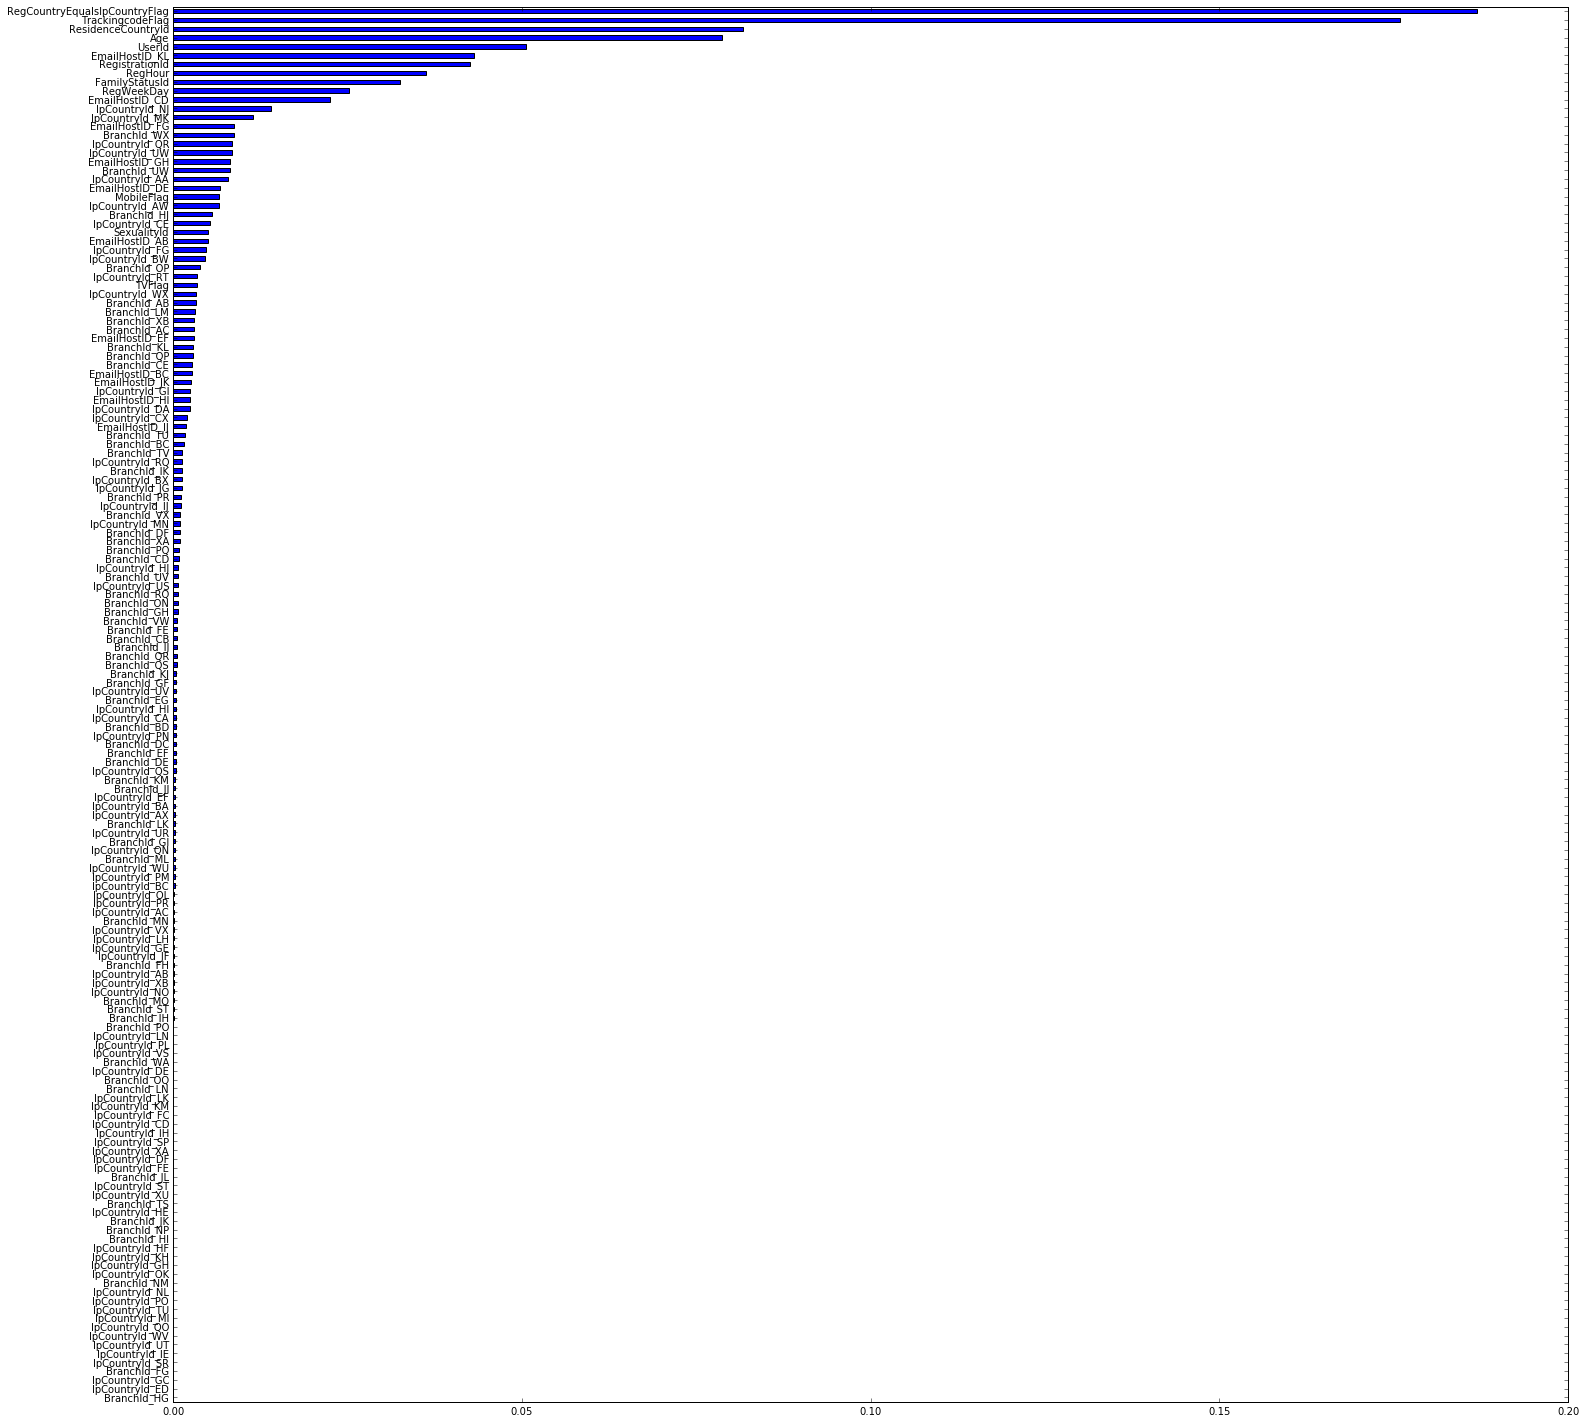

In [24]:
features_importance = pd.Series(rfr_mod.feature_importances_, index=X_train.columns.values)
features_importance.sort_values(inplace=True)
features_importance.plot(kind="barh", figsize=(25,25));

In [27]:
cross_validation.cross_val_score(rfr_mod, X_test, y_test, scoring='roc_auc')

array([ 0.96332454,  0.9656711 ,  0.96453729])

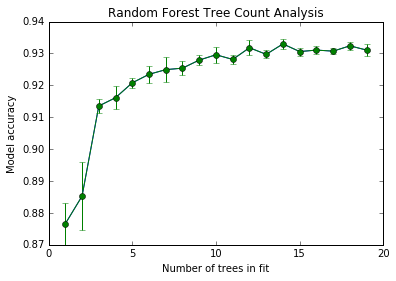

In [33]:
"""
Importance of number of trees in the random forest.
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""
idx_list = range(1, 20)
 
# loop over tree counts, doing 5 fits per count
accuracy_mean = []
accuracy_stddev = []

for idx in idx_list:
    accuracy = []
    for i in range(0,5):
        classifier = RandomForestClassifier(n_estimators=idx, oob_score=True, n_jobs=-1)
        classifier = classifier.fit(X_train,y_train)
        predictions = classifier.predict(X_test)
        accuracy.append(sklearn.metrics.accuracy_score(y_test, predictions))
    accuracy_mean.append(np.mean(accuracy))
    accuracy_stddev.append(np.std(accuracy))
    
plt.cla()
plt.plot(idx_list, accuracy_mean)
plt.errorbar(idx_list, accuracy_mean, yerr=accuracy_stddev, fmt='-o')
plt.xlabel('Number of trees in fit')
plt.ylabel('Model accuracy')

plt.title('Random Forest Tree Count Analysis')

In [34]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [286]:
scores = cross_validation.cross_val_score(clf, X_train, y_train, cv=5)

In [287]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.01)


In [279]:
cross_validation.cross_val_score(clf, X_test, y_test, scoring='roc_auc')

array([ 0.96114784,  0.96228664,  0.95950106])

In [35]:
C = 173
gamma = 1.31e-5
shrinking = True

probability = True
verbose = True

svc = svm.SVC( C = C, gamma = gamma, shrinking = shrinking, probability = probability, verbose = verbose )
svc.fit( X_train, y_train )

[LibSVM]

SVC(C=173, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.31e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [36]:
p = svc.predict_proba( X_test )	
auc = AUC( y_test, p[:,1] )
print auc

0.957821930337


In [37]:
scores = cross_validation.cross_val_score(svc, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy: 0.92 (+/- 0.02)


In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
# 2) svm
clf = svm.SVC(kernel='rbf')

anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)
anova_svm.predict(X_test)

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [39]:
scores = cross_validation.cross_val_score(anova_svm, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.02)


Start an ANN for the predictive model but not done yet.

In [ ]:
import theano

In [ ]:
theano.config.floatX = 'float32'
X_train_NN = X_train.astype(theano.config.floatX) 
X_test_NN = X_test.astype(theano.config.floatX)

In [ ]:
X_train_NN = train.ix[:,1:159].as_matrix()
X_test_NN  = test.ix[:,1:159].as_matrix()
y_train_NN = y_train.as_matrix()

In [ ]:
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
#(X_train_NN, y_train_NN), (X_test_NN, y_test_NN) = mnist.load_data()

In [ ]:
len(X_train_NN[1,:])

In [ ]:
from keras.utils import np_utils
print('First 3 labels: ', X_train_NN[:3])

In [ ]:
#img_rows, img_cols = 28, 28
#nb_classes = 10

In [ ]:
#y_train_ohe = np_utils.to_categorical(y_train_NN)
#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255
# convert class vectors to binary class matrices
#Y_train = np_utils.to_categorical(y_train, nb_classes)
#Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
Y_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [ ]:
np.random.seed(42) 

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(input_dim=X_train_NN.shape[1], 
...                 output_dim=50, 
...                 init='uniform', 
...                 activation='tanh'))

In [ ]:
model.add(Dense(input_dim=50, 
...                 output_dim=50, 
...                 init='uniform', 
...                 activation='tanh'))

model.add(Dense(input_dim=50, 
...                 output_dim=y_train_ohe.shape[1], 
...                 init='uniform', 
...                 activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])

In [ ]:
model.fit(X_train_NN, 
...           y_train_ohe, 
...           nb_epoch=50, 
...           batch_size=300, 
...           verbose=1, 
...           validation_split=0.1)

In [ ]:
y_train_pred = model.predict_classes(X_train_NN, verbose=0)
print('First 3 predictions: ', y_train_pred[:4])

In [ ]:
y_train_pred

In [ ]:
train_acc = np.sum(
...       y_train_NN == y_train_pred, axis=0) / X_train_NN.shape[0]
print('Training accuracy: %.2f%%' % (train_acc * 100))

In [ ]:
y_test_pred = model.predict_generator(X_test_NN)

In [ ]:
test_acc = np.sum(y_test == y_test_pred,
...                   axis=0) / X_test_NN.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))